In [1]:
#Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# DATA CLEANING

In [2]:
#DATA CLEANING

# Importing the CSV file 

df=pd.read_csv("netflix.csv")
df.tail()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
5845,tm1014599,Fine Wine,MOVIE,A beautiful love story that can happen between...,2021,NaN,100,"['romance', 'drama']",['NG'],NaN,tt13857480,6.8,45.0,1.466,NaN
5846,tm898842,C/O Kaadhal,MOVIE,A heart warming film that explores the concept...,2021,NaN,134,['drama'],[],NaN,tt11803618,7.7,348.0,NaN,NaN
5847,tm1059008,Lokillo,MOVIE,A controversial TV host and comedian who has b...,2021,NaN,90,['comedy'],['CO'],NaN,tt14585902,3.8,68.0,26.005,6.3
5848,tm1035612,Dad Stop Embarrassing Me - The Afterparty,MOVIE,"Jamie Foxx, David Alan Grier and more from the...",2021,PG-13,37,[],['US'],NaN,NaN,NaN,NaN,1.296,10.0
5849,ts271048,Mighty Little Bheem: Kite Festival,SHOW,"With winter behind them, Bheem and his townspe...",2021,NaN,7,"['family', 'animation', 'comedy']",[],1.0,tt13711094,7.8,18.0,2.289,10.0


In [3]:
#Getting the information regarding our datset to know how much null values are there..
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5850 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5850 non-null   int64  
 5   age_certification     3231 non-null   object 
 6   runtime               5850 non-null   int64  
 7   genres                5850 non-null   object 
 8   production_countries  5850 non-null   object 
 9   seasons               2106 non-null   float64
 10  imdb_id               5447 non-null   object 
 11  imdb_score            5368 non-null   float64
 12  imdb_votes            5352 non-null   float64
 13  tmdb_popularity       5759 non-null   float64
 14  tmdb_score            5539 non-null   float64
dtypes: float64(5), int64(

In [4]:
# Dropping the unnecessary columns 

df=df.drop(["id","description","imdb_id"],axis=1)
df.tail()

,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
5845,Fine Wine,MOVIE,2021,NaN,100,"['romance', 'drama']",['NG'],NaN,6.8,45.0,1.466,NaN
5846,C/O Kaadhal,MOVIE,2021,NaN,134,['drama'],[],NaN,7.7,348.0,NaN,NaN
5847,Lokillo,MOVIE,2021,NaN,90,['comedy'],['CO'],NaN,3.8,68.0,26.005,6.3
5848,Dad Stop Embarrassing Me - The Afterparty,MOVIE,2021,PG-13,37,[],['US'],NaN,NaN,NaN,1.296,10.0
5849,Mighty Little Bheem: Kite Festival,SHOW,2021,NaN,7,"['family', 'animation', 'comedy']",[],1.0,7.8,18.0,2.289,10.0


In [18]:
df["release_year"].unique()

# AS here we got to know that there are too many unique values for the release_year column so we will be shortening it

array([1945, 1976, 1972, 1975, 1967, 1969, 1979, 1971, 1980, 1961, 1966,
       1954, 1958, 1977, 1963, 1956, 1960, 1973, 1974, 1959, 1978, 1989,
       1990, 1987, 1984, 1983, 1982, 1986, 1981, 1988, 1985, 2000, 1996,
       1997, 1995, 1994, 1999, 1998, 1993, 1992, 1991, 2008, 2002, 2010,
       2005, 2007, 2004, 2006, 2009, 2003, 2001, 2011, 2012, 2013, 2014,
       2015, 2016, 2018, 2017, 2019, 2020, 2022, 2021], dtype=int64)

In [24]:
#Cleaning our "Year" column as there are too much unique values 
# We will be making a new variable which will be conataining years that have less than 100 movie/show relaesed 
# and we noticed that these all were before 2012

# Extracting Year from original YEARS column



Before 2012    5850
Name: release_year, dtype: int64

In [10]:
#Renaming ourn Column because it's name is too long to type again and again

df=df.rename(columns={"age_certification":"films"})

#Replacing the null values in Age Restriction column with "Not Rated " as we cant drop this much of data

df["films"].unique()
df["films"].isnull().sum()

df["films"]=df["films"].fillna("Not Rated")
df["films"].unique()

array(['TV-MA', 'R', 'PG', 'Not Rated', 'TV-14', 'PG-13', 'TV-PG', 'TV-Y',
       'TV-G', 'TV-Y7', 'G', 'NC-17'], dtype=object)

In [11]:
'''Replacing null values in Seasons column with "0" as mainly movies have null values and we know movies 
dont have any seasons so we will replace it with "0" instead of dropping them as we cant drop this much of 
data as movie occupies more than half of data'''


df["seasons"].isnull().sum()
df["seasons"].unique()

df["seasons"]=df["seasons"].fillna(0)
df["seasons"].unique()

array([ 1.,  0.,  4.,  9., 24.,  5., 39., 10., 13., 42., 25., 21., 37.,
        8., 29.,  7., 11., 14., 12.,  6., 32., 15., 19.,  2., 20.,  3.,
       16.])

In [12]:
'''Replacing null values in below three columns with their mean values'''
# We can do that seperately also but to save our time we did this ...!

three_col=df[["imdb_score","tmdb_popularity","tmdb_score"]]
df[["imdb_score","tmdb_popularity","tmdb_score"]]=three_col.apply(lambda x : x.fillna(np.mean(x)))
df["imdb_votes"].isnull().sum()

498

In [13]:
# Replacing the null values in IMDB votes column with "Not voted" as here we can't do mean and other
# arthimetic operations as giving a movie voting cant be decided by votes of other movies

df["imdb_votes"].value_counts()
df["imdb_votes"].fillna("Not Voted",inplace=True)
df["imdb_votes"].isnull().sum()

0

In [14]:
df.info()

#DONE we have cleaned our data there are no null values in our data 
#                      Bingoooo  !!!!!!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 5849 non-null   object 
 1   type                  5850 non-null   object 
 2   release_year          5850 non-null   object 
 3   age                   5850 non-null   object 
 4   runtime               5850 non-null   int64  
 5   genres                5850 non-null   object 
 6   production_countries  5850 non-null   object 
 7   seasons               5850 non-null   float64
 8   imdb_score            5850 non-null   float64
 9   imdb_votes            5850 non-null   object 
 10  tmdb_popularity       5850 non-null   float64
 11  tmdb_score            5850 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 548.6+ KB


In [16]:
df.tail()

,title,type,release_year,age,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
5845,Fine Wine,MOVIE,2021,Not Rated,100,"['romance', 'drama']",['NG'],0.0,6.800000,45.0,1.466000,6.829175
5846,C/O Kaadhal,MOVIE,2021,Not Rated,134,['drama'],[],0.0,7.700000,348.0,22.637925,6.829175
5847,Lokillo,MOVIE,2021,Not Rated,90,['comedy'],['CO'],0.0,3.800000,68.0,26.005000,6.300000
5848,Dad Stop Embarrassing Me - The Afterparty,MOVIE,2021,PG-13,37,[],['US'],0.0,6.510861,Not Voted,1.296000,10.000000
5849,Mighty Little Bheem: Kite Festival,SHOW,2021,Not Rated,7,"['family', 'animation', 'comedy']",[],1.0,7.800000,18.0,2.289000,10.000000


sns.countplot(x="type",data=df)

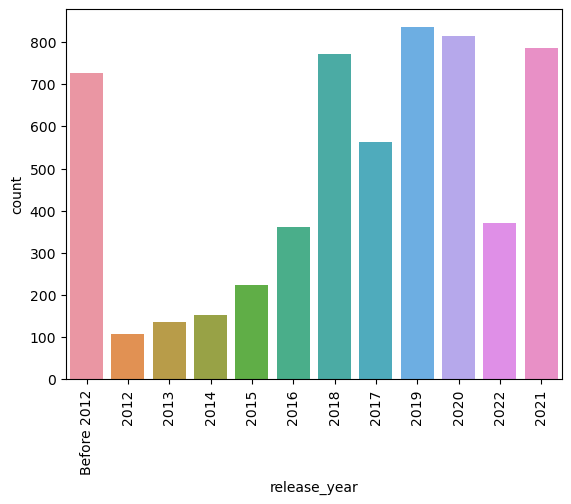

In [18]:
sns.countplot(x="release_year",data=df)
plt.xticks(rotation=90)
plt.show()


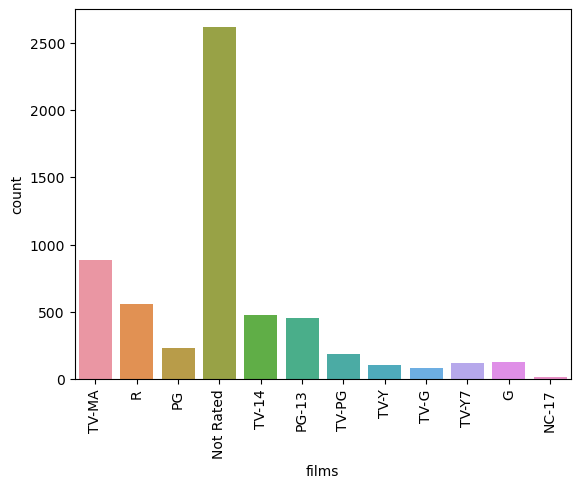

In [14]:
sns.countplot(x="films",data=df)
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='type', ylabel='imdb_score'>

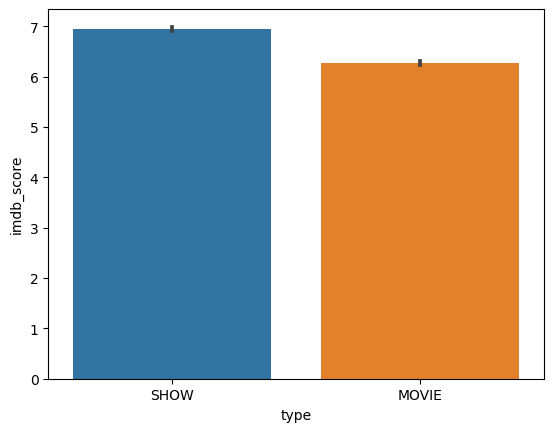

In [20]:
sns.barplot(x="type",y="imdb_score",data=df)

In [1]:
#conclusion

#the overall analyses in  netflix compare to movie the show hits too high in netflix so I would like to recommended watch show in netflix